data shape : 500 2


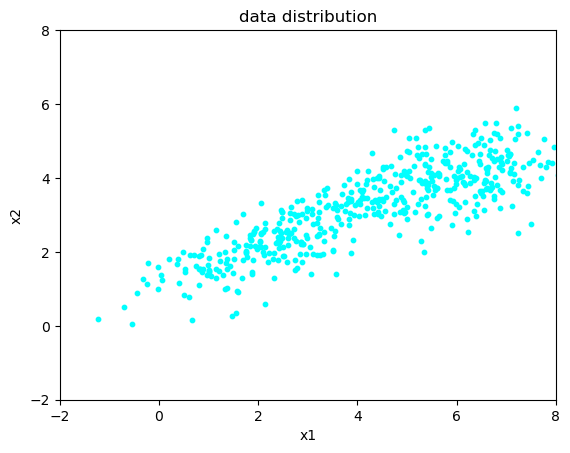

eig_values : [5.83912256 0.30921173]
eig_vectors : [[ 0.90322448 -0.42916843]
 [ 0.42916843  0.90322448]]
idx : [0 1]


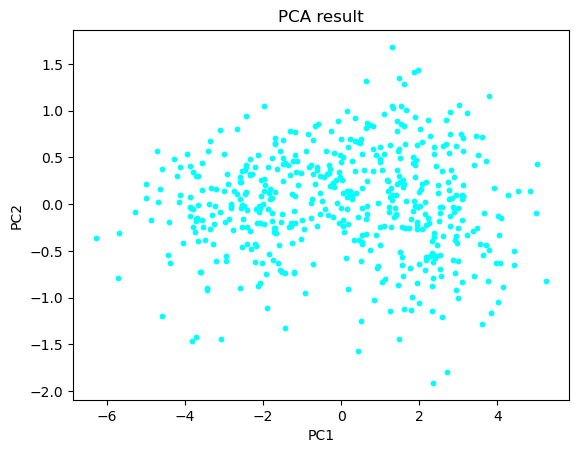

In [9]:

import numpy as np  
import matplotlib.pyplot as plt    

#导入数据集
data=np.loadtxt('PCA_dataset.csv', delimiter=',')
m,n=data.shape
print("data shape :",m,n)

#数据可视化
plt.scatter(data[:,0],data[:,1],marker='o',color='cyan',s=10)
plt.xlabel('x1')
plt.ylim(-2,8)
plt.xlim(-2,8)
plt.ylabel('x2')
plt.title('data distribution')
plt.show()

#定义pca函数 使用numpy中的线性代数运算库完成
def pca(data,k):
    """参数的含义为 data:数据集 k:主成分个数"""
    m,d=data.shape
    #如果维数小于k则报错
    if d<k:
        raise ValueError("k must be less than or equal to the number of features in data")
    #数据中心化
    data_mean=data-np.mean(data,axis=0)
    #计算协方差矩阵是为了判断数据的相关性
    cov_matrix=np.cov(data_mean,rowvar=False)
    #计算协方差矩阵的特征值和特征向量
    eig_values,eig_vectors=np.linalg.eig(cov_matrix)
    print("eig_values :",eig_values)
    print("eig_vectors :",eig_vectors)
    #获取最大的k个特征值对应的下标
    idx=np.argsort(eig_values)[::-1][:k]
    print("idx :",idx)
    #获取最大的k个特征值对应的特征向量
    eig_vectors_k=eig_vectors[:,idx]
    #将数据投影到新的空间 也就是实现对数据的降维
    data_pca=data_mean@eig_vectors_k
    return data_pca

#调用pca函数
k=2  #主成分的个数为2
data_pca=pca(data,k)
#数据可视化
plt.scatter(data_pca[:,0],data_pca[:,1],marker='o',color='cyan',s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA result')
plt.show()


本实验通过对二维数据集进行主成分分析（PCA），实现了数据的降维与特征提取。实验步骤包括数据的读取与可视化、数据中心化、协方差矩阵计算、特征值与特征向量分解、主成分选择以及数据在新空间的投影。实验结果显示，经过PCA处理后的数据能够在二维主成分空间中较好地展现原始数据的主要分布特征，有效去除了冗余信息。通过本实验，进一步加深了对PCA原理及其在数据降维中的应用理解，为后续高维数据分析和特征提取提供了理论与实践基础。
参数及其维数说明：

- data：原始数据集，类型为numpy.ndarray，维数为(m, n)，本实验中为(500, 2)。
- m：样本数量，即数据集中的行数，m=500。
- n：特征数量，即数据集中的列数，n=2。
- k：主成分个数，指定降维后的维度，本实验中k=2。
- data_mean：中心化后的数据，维数为(m, n)。
- cov_matrix：协方差矩阵，维数为(n, n)。
- eig_values：协方差矩阵的特征值，长度为n。
- eig_vectors：协方差矩阵的特征向量，维数为(n, n)。
- idx：按特征值大小排序后的索引，长度为k。
- eig_vectors_k：选取的前k个主成分对应的特征向量，维数为(n, k)。
- data_pca：降维后的数据，类型为numpy.ndarray，维数为(m, k)，本实验中为(500, 2)。

参数维数变化过程：

1. 原始数据 data: (m, n)
2. 数据中心化 data_mean: (m, n)
3. 协方差矩阵 cov_matrix: (n, n)
4. 特征值 eig_values: (n, )
5. 特征向量 eig_vectors: (n, n)
6. 选取前k个主成分 eig_vectors_k: (n, k)
7. 降维后数据 data_pca: (m, k)